## Assigment 3(DSTT,AM609)
## REg.No. 24-14-17
## Name: SAGAR SANTRA
## Course: M.Tech Modelling & Simulation

## Write a function that takes input (x,y) and returns MLE theta using Normal Equation. Use numpy in python to implement. Create a feature set x using linspace or np.random function and target values y. Call the function by passing these arguments and plot the precited values against input data.


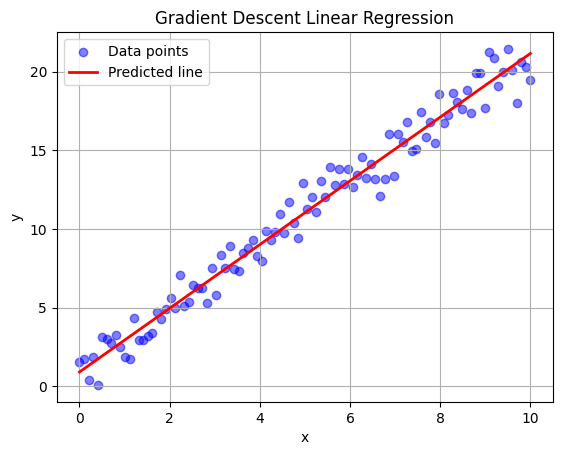

Estimated parameters (theta): [0.91351799 2.02331955]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 100) 
true_slope = 2.0
true_intercept = 1.0
noise = np.random.normal(0, 1, x.shape)
y = true_slope * x + true_intercept + noise

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(y)
    theta = np.zeros(2)
    X = np.zeros((m, 2)) 
    X[:, 0] = 1  
    X[:, 1] = x  

    for _ in range(iterations):
        predictions = np.dot(X, theta)  
        errors = predictions - y 
        gradients = (1/m) * np.dot(X.T, errors) 
        theta -= learning_rate * gradients  

    return theta
theta = gradient_descent(x, y)
predicted_y = theta[0] + theta[1] * x

# Plotting the results
plt.scatter(x, y, label='Data points', color='blue', alpha=0.5)
plt.plot(x, predicted_y, label='Predicted line', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.grid()
plt.show()
print(f"Estimated parameters (theta): {theta}")


## Write a program to implement polynomial regression and compare it with the result obtained in the last question by plotting both the hypothesis.

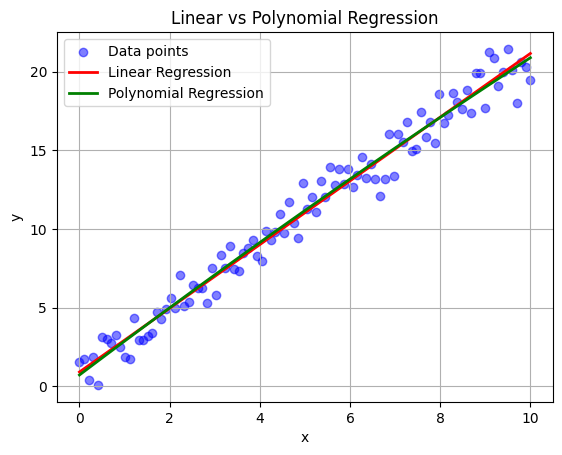

Coefficients for Polynomial Regression: [-0.01475087  2.16268538  0.72430904]


In [2]:
degree = 2
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)
predicted_y_polynomial = polynomial(x)
plt.scatter(x, y, label='Data points', color='blue', alpha=0.5)
plt.plot(x, predicted_y, label='Linear Regression', color='red', linewidth=2)
plt.plot(x, predicted_y_polynomial, label='Polynomial Regression', color='green', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.grid()
plt.show()

print(f"Coefficients for Polynomial Regression: {coefficients}")


## Access the effects of outliers while training a linear regression by introducing some outliers in the data. Propose a solution how these outliers can be detected and removed before training the model. Implement the solution in python.

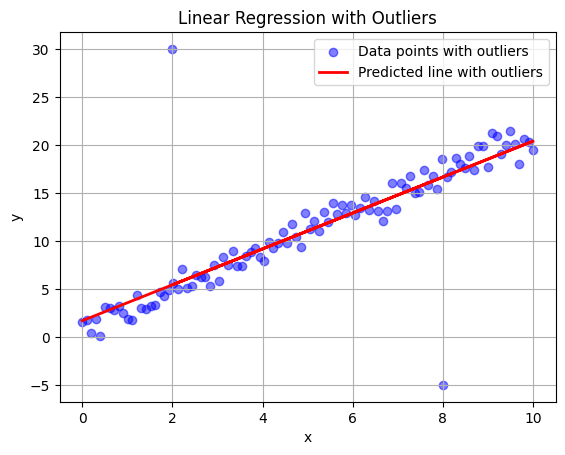

Estimated parameters (theta) with outliers: [1.68535281 1.87116655]


In [3]:
outliers_x = np.array([2, 8])
outliers_y = np.array([30, -5])
x_with_outliers = np.concatenate((x, outliers_x))
y_with_outliers = np.concatenate((y, outliers_y))
theta_outliers = gradient_descent(x_with_outliers, y_with_outliers)
predicted_y_outliers = theta_outliers[0] + theta_outliers[1] * x_with_outliers
plt.scatter(x_with_outliers, y_with_outliers, label='Data points with outliers', color='blue', alpha=0.5)
plt.plot(x_with_outliers, predicted_y_outliers, label='Predicted line with outliers', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Outliers')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated parameters (theta) with outliers: {theta_outliers}")


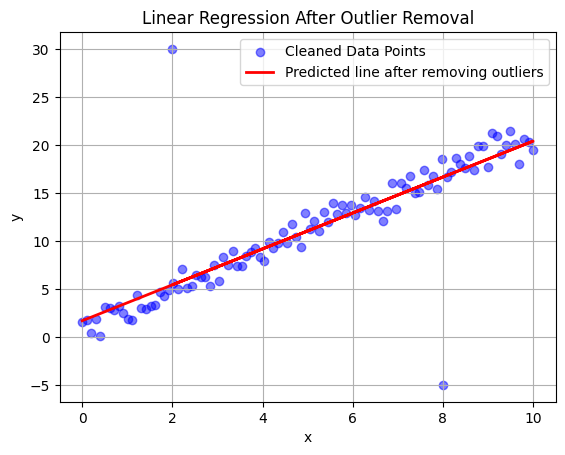

Estimated parameters (theta) after removing outliers: [1.68535281 1.87116655]


In [4]:
def remove_outliers(x, y):
    Q1 = np.percentile(y, 25)
    Q3 = np.percentile(y, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]
x_cleaned, y_cleaned = remove_outliers(x_with_outliers, y_with_outliers)
theta_cleaned = gradient_descent(x_cleaned, y_cleaned)
predicted_y_cleaned = theta_cleaned[0] + theta_cleaned[1] * x_cleaned
plt.scatter(x_cleaned, y_cleaned, label='Cleaned Data Points', color='blue', alpha=0.5)
plt.plot(x_cleaned, predicted_y_cleaned, label='Predicted line after removing outliers', color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression After Outlier Removal')
plt.legend()
plt.grid()
plt.show()

print(f"Estimated parameters (theta) after removing outliers: {theta_cleaned}")
